<a href="https://colab.research.google.com/github/Dhaneshkp/creditCardDefaulters/blob/main/TensorFlow_CNN1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

Everst_data=pd.read_csv('average_premium.csv')
data=Everst_data
data['Attained_age']=data['Age']+data['Duration']
data['Premium_rate']=data['BasePremiumAmount']/data['BaseNARAmount']*10000
#exclude_cols = ['Gender','RiskClass']
Coulmns_to_keep=['Age','Premium_rate','Gender','RiskClass','Duration']
#data=data[data['SingleOrJointType']=="Single"]
#data=data[data['Gender']=="Male"]
#data=data[data['RiskClass']=="NS1"]
data=data[Coulmns_to_keep]
data=data[(data['RiskClass']!="SS1") & (data['RiskClass']!="SS2")& (data['RiskClass']!="SP1")]
data['index']=data.index
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
data_copy=data.copy()
data['Premium_rate']=log(data['Premium_rate'])


FileNotFoundError: [Errno 2] No such file or directory: 'average_premium.csv'

In [154]:
# Create a multi-index dataframe using Age, Duration, and a combined Gender and RiskClass column

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
data['RiskClass'] = data['RiskClass'].replace({'N+1': 'NP2', 'NP1': 'NP2'}).replace({'NS3': 'NS2', 'NS2': 'NS2', 'NR1': 'NS2', 'NS1' : 'NS2'})
print(data)
print(data['RiskClass'].unique())
multi_index_df = data.set_index(['Age', 'Duration', data['Gender'] + '_' + data['RiskClass']])

# Convert the multi-index dataframe to a regular dataframe
result_df = multi_index_df.reset_index().drop(['Gender', 'RiskClass'], axis=1)
print(result_df)
result_df['level_2'].unique()
result_df=result_df[result_df['level_2']!='NaN'].dropna()

         Age  Premium_rate  Gender RiskClass  Duration    index
0         52     32.884713  Female       NP2         8        0
1         25      7.822222    Male       NP2         7        1
2         20      3.640212  Female       NS2         8        2
4         38     11.758730    Male       NP2         8        4
5         30      5.480635    Male       NS2         8        5
...      ...           ...     ...       ...       ...      ...
1611670   42     14.140952  Female       NS2         8  1611670
1611671   26      8.441690    Male       NP2         8  1611671
1611672   30      5.466667    Male       NP2         8  1611672
1611673   43     16.142857    Male       NP2         8  1611673
1611675   58     75.130864    Male       NS2         7  1611675

[1474122 rows x 6 columns]
['NP2' 'NS2']
         Age  Duration     level_2  Premium_rate    index
0         52         8  Female_NP2     32.884713        0
1         25         7    Male_NP2      7.822222        1
2         20    

In [155]:
# apply stratified samplingn to retrun 20% data  where the groups of age_duration_gender riskclass has similar set of recoords

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(result_df, result_df['level_2']):
  strat_train_set = result_df.loc[train_index]
  strat_test_set = result_df.loc[test_index]


In [156]:
# prompt: for the dsata  result_df_no_na one hot encode the level_2

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

# Before removing NAs
print("Before removing NAs:")
print(strat_train_set.describe(include='all'))
print(strat_train_set.count())

# Drop rows with missing values
result_df_no_na = strat_train_set.dropna()

# After removing NAs
print("\nAfter removing NAs:")
print(result_df_no_na.describe(include='all'))
print(result_df_no_na.count())


Before removing NAs:
                 Age      Duration     level_2  Premium_rate         index
count   1.179297e+06  1.179297e+06     1179297  1.179297e+06  1.179297e+06
unique           NaN           NaN           4           NaN           NaN
top              NaN           NaN  Female_NP2           NaN           NaN
freq             NaN           NaN      353563           NaN           NaN
mean    3.726661e+01  4.559350e+00         NaN  1.256725e+01  8.059706e+05
std     1.118757e+01  2.523417e+00         NaN  2.203489e+01  4.650281e+05
min     1.700000e+01  1.000000e+00         NaN -5.314881e+01  0.000000e+00
25%     2.800000e+01  2.000000e+00         NaN  3.952381e+00  4.031770e+05
50%     3.600000e+01  4.000000e+00         NaN  6.969312e+00  8.061670e+05
75%     4.500000e+01  6.000000e+00         NaN  1.258201e+01  1.208389e+06
max     7.000000e+01  1.100000e+01         NaN  1.855407e+03  1.611672e+06
Age             1179297
Duration        1179297
level_2         1179297
Premium

In [157]:
result_df_encoded=result_df_no_na
result_df_encoded['level_2_Female_NP2']=(result_df_encoded['level_2']=='Female_NP2').astype(int)
result_df_encoded['level_2_Male_NP2']=(result_df_encoded['level_2']=='Male_NP2').astype(int)
result_df_encoded['level_2_Male_NS2']=(result_df_encoded['level_2']=='Male_NS2').astype(int)
#result_df_encoded = pd.concat([result_df_no_na, encoded_df], axis=1)

# Optionally, drop the original 'level_2' column

result_df_encoded = result_df_encoded.drop('level_2', axis=1)
print(result_df_encoded)

         Age  Duration  Premium_rate    index  level_2_Female_NP2  \
545368    42         5     10.239153   596562                   1   
638917    29         4      3.830688   698821                   0   
846369    33         4      3.397994   925363                   1   
1423532   39         6      9.358730  1556447                   1   
38248     19         5      9.409524    41890                   0   
...      ...       ...           ...      ...                 ...   
333354    30         5      3.904762   364538                   1   
474298    31         5      4.428571   518857                   0   
547135    33         2      1.269841   598495                   1   
345902    35         5      5.551587   378250                   1   
753082    31         7      5.399849   823531                   0   

         level_2_Male_NP2  level_2_Male_NS2  
545368                  0                 0  
638917                  0                 0  
846369                  0        

In [158]:
# prompt: instead of the encoder above do the same finding the minimu and maximum values for contonous value columns , scale the variable using the maximum value s

# Assuming 'result_df_no_na' is your DataFrame from the preceding code

# Identify continuous value columns
continuous_cols = ['Age', 'Duration', 'Premium_rate']  # Replace with actual column names

# Calculate minimum and maximum values for each continuous column
min_values = result_df_encoded[continuous_cols].min()
max_values = result_df_encoded[continuous_cols].max()

# Scale the continuous variables using maximum values
for col in continuous_cols:
    result_df_encoded[col] = result_df_encoded[col] / max_values[col]

# Display the scaled DataFrame
print(result_df_encoded)
max_values

              Age  Duration  Premium_rate    index  level_2_Female_NP2  \
545368   0.600000  0.454545      0.005519   596562                   1   
638917   0.414286  0.363636      0.002065   698821                   0   
846369   0.471429  0.363636      0.001831   925363                   1   
1423532  0.557143  0.545455      0.005044  1556447                   1   
38248    0.271429  0.454545      0.005071    41890                   0   
...           ...       ...           ...      ...                 ...   
333354   0.428571  0.454545      0.002105   364538                   1   
474298   0.442857  0.454545      0.002387   518857                   0   
547135   0.471429  0.181818      0.000684   598495                   1   
345902   0.500000  0.454545      0.002992   378250                   1   
753082   0.442857  0.636364      0.002910   823531                   0   

         level_2_Male_NP2  level_2_Male_NS2  
545368                  0                 0  
638917             

Age               70.000000
Duration          11.000000
Premium_rate    1855.407407
dtype: float64

In [159]:
# prompt: use a hyper parameter search on the model using CNN , og the data set ; use convolutional newral nets directly not through keras regressor, use a for loop instaed of using gridsearch and parameters its not working

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data_test=result_df_encoded.head(400000)
#data_test.sort_values(by=['Age', 'Duration','level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2'],inplace=True)
data_train=result_df_encoded.tail(100000)
#data_train.sort_values(by=['Age', 'Duration','level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2'],inplace=True)


# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42,shuffle=False)


In [160]:

# Split the data into features (X) and target variable (y)
X_train= data_test.drop(['Premium_rate','index'], axis=1)
y_train = data_test['Premium_rate']

X_test= data_train.drop(['Premium_rate','index'], axis=1)
y_test = data_train['Premium_rate']

# Reshape the input data for CNN (samples, timesteps, features)

In [161]:
X_train_np= X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_np= X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_np= y_train.values.reshape(y_train.shape[0], 1)
y_test_np= y_test.values.reshape(y_test.shape[0], 1)

In [162]:
X_test

,Age,Duration,level_2_Female_NP2,level_2_Male_NP2,level_2_Male_NS2
935106,0.685714,0.363636,0,1,0
509255,0.714286,0.181818,1,0,0
554357,0.400000,0.181818,0,0,1
1157157,0.742857,0.636364,0,1,0
467252,0.457143,0.454545,0,0,1
...,...,...,...,...,...
333354,0.428571,0.454545,1,0,0
474298,0.442857,0.454545,0,1,0
547135,0.471429,0.181818,1,0,0
345902,0.500000,0.454545,1,0,0


In [163]:
from tensorflow.keras.callbacks import EarlyStopping
# Hyperparameter options
filters_list = [16]
kernel_sizes_list = [2,3]
dense_units_list = [32]

best_mse = float('inf')
best_params = {}

# Iterate over hyperparameter combinations
for filters in filters_list:
    for kernel_size in kernel_sizes_list:
        for dense_units in dense_units_list:
            # Build the CNN model
            model = Sequential()
            model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)))
            model.add(MaxPooling1D())
            model.add(Flatten())
            model.add(Dense(dense_units, activation='relu'))
            model.add(Dense(1))  # Output layer for regression

            # Compile the model
            model.compile(optimizer='adam', loss='mean_squared_error')
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            # Train the model
            model.fit(X_train_np, y_train_np, epochs=10, batch_size=128, verbose=1,
                        validation_data=(X_test_np, y_test_np), callbacks=[early_stopping])

            # Evaluate the model
            y_pred = model.predict(X_test_np)
            mse = mean_squared_error(y_test_np, y_pred)

            # Update best parameters if current model performs better
            if mse < best_mse:
                best_mse = mse
                best_params = {'filters': filters, 'kernel_size': kernel_size, 'dense_units': dense_units}

# Print the best hyperparameters and corresponding MSE
print("Best Hyperparameters:", best_params)
print("Best MSE:", best_mse)


Epoch 1/10
3125/3125 [==============================] - 9s 3ms/step - loss: 9.6636e-05 - val_loss: 6.8640e-05
Epoch 2/10
3125/3125 [==============================] - 9s 3ms/step - loss: 5.4474e-05 - val_loss: 4.6699e-05
Epoch 3/10
3125/3125 [==============================] - 7s 2ms/step - loss: 4.9474e-05 - val_loss: 4.5301e-05
Epoch 4/10
3125/3125 [==============================] - 8s 3ms/step - loss: 4.7445e-05 - val_loss: 4.3701e-05
Epoch 5/10
3125/3125 [==============================] - 7s 2ms/step - loss: 4.5647e-05 - val_loss: 4.3460e-05
Epoch 6/10
3125/3125 [==============================] - 10s 3ms/step - loss: 4.4642e-05 - val_loss: 4.2015e-05
Epoch 7/10
3125/3125 [==============================] - 7s 2ms/step - loss: 4.3890e-05 - val_loss: 4.0607e-05
Epoch 8/10
3125/3125 [==============================] - 9s 3ms/step - loss: 4.3323e-05 - val_loss: 3.9156e-05
Epoch 9/10
3125/3125 [==============================] - 7s 2ms/step - loss: 4.2834e-05 - val_loss: 3.9827e-05
Epoch 10/

In [164]:
max_values

Age               70.000000
Duration          11.000000
Premium_rate    1855.407407
dtype: float64

In [165]:
X_test

,Age,Duration,level_2_Female_NP2,level_2_Male_NP2,level_2_Male_NS2
935106,0.685714,0.363636,0,1,0
509255,0.714286,0.181818,1,0,0
554357,0.400000,0.181818,0,0,1
1157157,0.742857,0.636364,0,1,0
467252,0.457143,0.454545,0,0,1
...,...,...,...,...,...
333354,0.428571,0.454545,1,0,0
474298,0.442857,0.454545,0,1,0
547135,0.471429,0.181818,1,0,0
345902,0.500000,0.454545,1,0,0


In [166]:
continuous_cols = ['Age', 'Duration'] # Replace with actual column names

# Scale back continuous columns
# Create a DataFrame from X_test for easier manipulation

# Scale back continuous columns
for i in continuous_cols:
    X_test[i] = X_test[i] * max_values[i]

X_test



,Age,Duration,level_2_Female_NP2,level_2_Male_NP2,level_2_Male_NS2
935106,48.0,4.0,0,1,0
509255,50.0,2.0,1,0,0
554357,28.0,2.0,0,0,1
1157157,52.0,7.0,0,1,0
467252,32.0,5.0,0,0,1
...,...,...,...,...,...
333354,30.0,5.0,1,0,0
474298,31.0,5.0,0,1,0
547135,33.0,2.0,1,0,0
345902,35.0,5.0,1,0,0


In [167]:
# prompt: select the bst model from above and apply on the data to show te also scale the premium back to original scale predicted and actual premiums  , also show other ccolumns in the data set

# Build the best CNN model based on identified hyperparameters
best_model = Sequential()
best_model.add(Conv1D(filters=best_params['filters'], kernel_size=best_params['kernel_size'], activation='relu', input_shape=(X_train.shape[1], 1)))
best_model.add(MaxPooling1D())
best_model.add(Flatten())
best_model.add(Dense(best_params['dense_units'], activation='relu'))
best_model.add(Dense(1))  # Output layer for regression

# Compile the best model
best_model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Train the best model (you might want to adjust epochs and batch_size)
best_model.fit(X_train_np, y_train_np, epochs=10, batch_size=32)

# Predict on the test set
y_pred_scaled = best_model.predict(X_test_np)

# Scale predicted and actual premiums back to original scale
y_pred_original = y_pred_scaled * max_values['Premium_rate']
y_test_original = y_test * max_values['Premium_rate']



Epoch 1/10
12500/12500 [==============================] - 25s 2ms/step - loss: 1.4912e-04
Epoch 2/10
12500/12500 [==============================] - 23s 2ms/step - loss: 4.8430e-05
Epoch 3/10
12500/12500 [==============================] - 24s 2ms/step - loss: 4.5192e-05
Epoch 4/10
12500/12500 [==============================] - 24s 2ms/step - loss: 4.4525e-05
Epoch 5/10
12500/12500 [==============================] - 23s 2ms/step - loss: 4.3934e-05
Epoch 6/10
12500/12500 [==============================] - 24s 2ms/step - loss: 4.3373e-05
Epoch 7/10
12500/12500 [==============================] - 23s 2ms/step - loss: 4.3221e-05
Epoch 8/10
12500/12500 [==============================] - 24s 2ms/step - loss: 4.2961e-05
Epoch 9/10
12500/12500 [==============================] - 23s 2ms/step - loss: 4.2753e-05
Epoch 10/10
3125/3125 [==============================] - 4s 1ms/step


In [168]:
y_pred_df=pd.DataFrame({'Premium_pred':y_pred_original.flatten()})
y_pred_df

,Premium_pred
0,17.202396
1,8.866835
2,8.006108
3,35.556824
4,8.301019
...,...
99995,6.754871
99996,8.703232
99997,3.250540
99998,7.039605


In [169]:
X_test.reset_index(drop=True, inplace=True)
y_test_original.reset_index(drop=True, inplace=True)

In [170]:
# Create a DataFrame to compare actual and predicted premiums along with other columns
comparison_df = pd.concat([X_test,y_test_original,y_pred_df], axis=1)
comparison_df.reset_index(drop=True, inplace=True)
comparison_df

,Age,Duration,level_2_Female_NP2,level_2_Male_NP2,level_2_Male_NS2,Premium_rate,Premium_pred
0,48.0,4.0,0,1,0,15.572060,17.202396
1,50.0,2.0,1,0,0,9.206349,8.866835
2,28.0,2.0,0,0,1,3.949206,8.006108
3,52.0,7.0,0,1,0,78.444444,35.556824
4,32.0,5.0,0,0,1,4.770563,8.301019
...,...,...,...,...,...,...,...
99995,30.0,5.0,1,0,0,3.904762,6.754871
99996,31.0,5.0,0,1,0,4.428571,8.703232
99997,33.0,2.0,1,0,0,1.269841,3.250540
99998,35.0,5.0,1,0,0,5.551587,7.039605


In [186]:
comparison_df.sort_values(by=['Age', 'Duration','level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2'], inplace=True)
#Compare_df_copy=comparison_df.copy()
comparison_df.groupby(['Age', 'Duration','level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2']).mean()
comparison_df.groupby(['Age', 'Duration','level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2']).median()

Premium_rate  \
Age  Duration level_2_Female_NP2 level_2_Male_NP2 level_2_Male_NS2                 
18.0 1.0      0                  0                0                     2.298413   
                                                  1                     9.629630   
                                 1                0                     6.841270   
              1                  0                0                     1.950265   
     2.0      0                  0                0                     1.523616   
...                                                                          ...   
70.0 8.0      1                  0                0                   172.195556   
     9.0      0                  0                0                   205.848889   
                                                  1                   689.777778   
     10.0     0                  0                0                   245.955556   
                                                  1                   318.364444   

                                                                    Premium_pred  
Age  Duration level_2_Female_NP2 level_2_Male_NP2 level_2_Male_NS2                
18.0 1.0      0                  0                0                     3.935715  
                                                  1                     7.964679  
                                 1                0                     8.004094  
              1                  0                0                     4.688700  
     2.0      0                  0                0                     3.936136  
...                                                                          ...  
70.0 8.0      1                  0                0                   188.419205  
     9.0      0                  0                0                   230.136215  
                                                  1                   299.329010  
     10.0     0                  0                0                   254.977264  
                                                  1                   324.157562  

[1922 rows x 2 columns]

In [190]:
# prompt: find the topr 5% of observations where the absolute % difference between premium_rate and premium_pred is higher

# Calculate the absolute percentage difference
comparison_df['Abs_Percent_Diff'] = abs((comparison_df['Premium_rate'] - comparison_df['Premium_pred']) / comparison_df['Premium_rate']) * 100

# Sort by absolute percentage difference in descending order
comparison_df_sorted = comparison_df.sort_values('Abs_Percent_Diff', ascending=False)

# Get the top 5% of observations
top_2_5_percent = int(0.025 * len(comparison_df_sorted))
top_2_5_percent_df = comparison_df_sorted.head(top_5_percent)

print(top_2_5_percent_df)


        Age  Duration  level_2_Female_NP2  level_2_Male_NP2  level_2_Male_NS2  \
99989  45.0       1.0                   0                 0                 1   
72872  34.0       2.0                   1                 0                 0   
13622  34.0       9.0                   0                 0                 0   
3402   48.0       4.0                   0                 0                 1   
58451  48.0       4.0                   0                 0                 0   
...     ...       ...                 ...               ...               ...   
35840  39.0       1.0                   1                 0                 0   
79156  21.0       1.0                   1                 0                 0   
33964  21.0       1.0                   1                 0                 0   
46484  21.0       1.0                   1                 0                 0   
25398  21.0       1.0                   1                 0                 0   

       Premium_rate  Premiu

In [191]:
Compare_df_copy.sort_values(by=['level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2','Age', 'Duration'], inplace=True)
Compare_df_copy.groupby(['level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2','Age', 'Duration']).mean()
Compare_df_copy.groupby(['level_2_Female_NP2','level_2_Male_NP2','level_2_Male_NS2','Age', 'Duration']).median()

Premium_rate  \
level_2_Female_NP2 level_2_Male_NP2 level_2_Male_NS2 Age  Duration                 
0                  0                0                18.0 1.0           2.298413   
                                                          2.0           1.523616   
                                                          3.0           3.174603   
                                                          4.0           3.259259   
                                                          5.0           2.888889   
...                                                                          ...   
1                  0                0                70.0 4.0          81.841270   
                                                          5.0          99.174603   
                                                          6.0         119.047619   
                                                          7.0         142.158730   
                                                          8.0         172.195556   

                                                                    Premium_pred  
level_2_Female_NP2 level_2_Male_NP2 level_2_Male_NS2 Age  Duration                
0                  0                0                18.0 1.0           3.064112  
                                                          2.0           3.064112  
                                                          3.0           3.064112  
                                                          4.0           3.064112  
                                                          5.0           2.079935  
...                                                                          ...  
1                  0                0                70.0 4.0          85.524254  
                                                          5.0         100.917839  
                                                          6.0         114.917145  
                                                          7.0         145.584549  
                                                          8.0         178.495697  

[1922 rows x 2 columns]

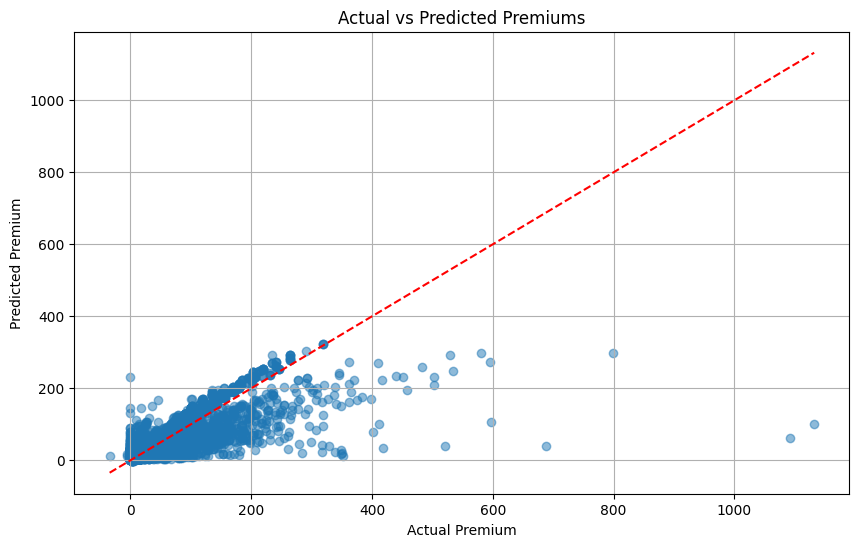

In [172]:
# prompt: plot predicted and actual

import matplotlib.pyplot as plt

# Assuming 'comparison_df' is your DataFrame from the preceding code

# Scatter plot of actual vs predicted premiums
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Premium_rate'], comparison_df['Premium_pred'], alpha=0.5)
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.title('Actual vs Predicted Premiums')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(comparison_df['Premium_rate']), max(comparison_df['Premium_rate'])],
         [min(comparison_df['Premium_rate']), max(comparison_df['Premium_rate'])],
         linestyle='--', color='red')

plt.show()
